# Brain Cancer Survival Estimation Pediction


[data link](https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=70225642#70225642c94d520b7b5f42e7925602d723412459)

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/sample_data/UPENN-GBM_clinical_info_v1.0.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          671 non-null    object 
 1   Gender                      671 non-null    object 
 2   Age_at_scan_years           671 non-null    float64
 3   Survival_from_surgery_days  671 non-null    object 
 4   IDH1                        671 non-null    object 
 5   MGMT                        671 non-null    object 
 6   KPS                         671 non-null    object 
 7   GTR_over90percent           671 non-null    object 
 8   Time_since_baseline_preop   671 non-null    object 
 9   PsP_TP_score                60 non-null     float64
dtypes: float64(2), object(8)
memory usage: 52.5+ KB


In [ ]:
# Dropping Redundant Columns
new_df = df.drop(['PsP_TP_score','GTR_over90percent','Time_since_baseline_preop','IDH1','MGMT','KPS'],axis=1)

In [ ]:
new_df.info()
new_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          671 non-null    object 
 1   Gender                      671 non-null    object 
 2   Age_at_scan_years           671 non-null    float64
 3   Survival_from_surgery_days  671 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


,ID,Gender,Age_at_scan_years,Survival_from_surgery_days
0,UPENN-GBM-00001_11,F,52.16,Not Available
1,UPENN-GBM-00002_11,F,61.30,291
2,UPENN-GBM-00003_11,M,42.82,Not Available
3,UPENN-GBM-00004_11,M,33.43,Not Available
4,UPENN-GBM-00005_11,M,53.33,Not Available


In [ ]:
# Converting String to Integer Values 

## change --- check\/
new_df['Survival_from_surgery_days'] = pd.to_numeric(df['Survival_from_surgery_days'], errors='coerce').fillna(0).astype(int)

new_df['Age_at_scan_years'] = new_df['Age_at_scan_years'].round().astype(int)

new_df.reset_index()

,index,ID,Gender,Age_at_scan_years,Survival_from_surgery_days
0,0,UPENN-GBM-00001_11,F,52,0
1,1,UPENN-GBM-00002_11,F,61,291
2,2,UPENN-GBM-00003_11,M,43,0
3,3,UPENN-GBM-00004_11,M,33,0
4,4,UPENN-GBM-00005_11,M,53,0
...,...,...,...,...,...
666,666,UPENN-GBM-00626_21,F,57,0
667,667,UPENN-GBM-00627_21,F,57,0
668,668,UPENN-GBM-00628_21,M,55,0
669,669,UPENN-GBM-00629_21,M,71,0


In [ ]:
new_df.head()

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days
0,UPENN-GBM-00001_11,F,52,0
1,UPENN-GBM-00002_11,F,61,291
2,UPENN-GBM-00003_11,M,43,0
3,UPENN-GBM-00004_11,M,33,0
4,UPENN-GBM-00005_11,M,53,0


In [ ]:
new_df.describe()

,Age_at_scan_years,Survival_from_surgery_days
count,671.000000,671.000000
mean,62.464978,284.380030
std,12.360440,352.417621
min,19.000000,0.000000
25%,55.000000,0.000000
50%,63.000000,166.000000
75%,71.000000,450.000000
max,88.000000,2207.000000


In [ ]:
# Saving the csv File
# new_df.to_csv('clinical-modifed.csv',index=False)

## Feature Extraction

In [ ]:
clinical_data_df = pd.read_csv('/content/sample_data/clinical-modifed.csv')
cd_df = clinical_data_df.copy()

In [ ]:
import os

In [ ]:
# os.listdir('./data/')
feature= pd.DataFrame()
csv_files = os.listdir('/content/sample_data/data')

for file in csv_files:
    df_temp = pd.read_csv('/content/sample_data/data/'+file)
    cd_df = pd.merge(cd_df,df_temp,left_on="ID",right_on="SubjectID",how="left",suffixes=('', '_drop'))
        


In [ ]:
cd_df.drop([col for col in cd_df.columns if 'drop' in col], axis=1, inplace=True)

In [ ]:
cd_df.columns

Index(['ID', 'Gender', 'Age_at_scan_years', 'Survival_from_surgery_days',
       'SubjectID', 'DSC_PSR_ED_Intensity_CoefficientOfVariation',
       'DSC_PSR_ED_Intensity_Energy',
       'DSC_PSR_ED_Intensity_InterQuartileRange',
       'DSC_PSR_ED_Intensity_Kurtosis', 'DSC_PSR_ED_Intensity_Maximum',
       ...
       'DSC_PSR_NC_GLSZM_Bins-16_Radius-1_ZoneSizeMean',
       'DSC_PSR_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity',
       'DSC_PSR_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized',
       'DSC_PSR_NC_GLSZM_Bins-16_Radius-1_ZoneSizeVariance',
       'DSC_PSR_NC_NGTDM_Busyness', 'DSC_PSR_NC_NGTDM_Coarsness',
       'DSC_PSR_NC_NGTDM_Complexity', 'DSC_PSR_NC_NGTDM_Contrast',
       'DSC_PSR_NC_NGTDM_Strength', 'DSC_PSR_NC_LBP_Radius-1_Bins-16_LBP'],
      dtype='object', length=4757)

In [ ]:
#cd_df.to_csv('training-data.csv',index=False)

In [ ]:
df = pd.read_csv('/content/sample_data/training-data.csv', low_memory=False)

In [ ]:
new_df = df.dropna()
new_df.describe()

,Age_at_scan_years,Survival_from_surgery_days,DSC_ap-rCBV_ED_Intensity_CoefficientOfVariation,DSC_ap-rCBV_ED_Intensity_Energy,DSC_ap-rCBV_ED_Intensity_InterQuartileRange,DSC_ap-rCBV_ED_Intensity_Kurtosis,DSC_ap-rCBV_ED_Intensity_Maximum,DSC_ap-rCBV_ED_Intensity_Mean,DSC_ap-rCBV_ED_Intensity_MeanAbsoluteDeviation,DSC_ap-rCBV_ED_Intensity_Median,...,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeMean,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeVariance,T2_NC_NGTDM_Busyness,T2_NC_NGTDM_Coarsness,T2_NC_NGTDM_Complexity,T2_NC_NGTDM_Contrast,T2_NC_NGTDM_Strength,T2_NC_LBP_Radius-1_Bins-16_LBP
count,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,61.398305,481.067797,0.839961,6.531428e+07,23.720339,11.717749,228.601695,30.909500,6.074547e-13,23.881356,...,17.478734,151.734460,0.273270,27808.439843,84.036280,0.000822,1029.692432,0.621053,0.088802,102727.858049
std,12.430415,408.719236,0.204523,5.158566e+07,12.074474,6.579110,31.253346,14.516671,3.536699e-12,13.943212,...,10.999177,143.127550,0.051019,56382.587789,104.802790,0.002437,324.244530,0.376285,0.237433,126829.309293
min,22.000000,12.000000,0.383445,5.305319e+06,7.000000,2.973199,108.000000,11.933020,-9.771044e-12,0.000000,...,1.758621,7.774194,0.151855,0.941736,0.645038,0.000010,577.798506,0.096414,0.001178,653.769380
25%,54.000000,208.250000,0.682896,2.648920e+07,15.000000,7.195066,212.000000,20.842317,-6.271516e-13,14.000000,...,8.217772,58.286422,0.235387,1370.045817,18.536621,0.000053,847.356917,0.355515,0.007150,25132.769310
50%,61.000000,383.500000,0.855030,5.096723e+07,20.000000,10.057632,237.000000,26.761068,7.260399e-14,19.000000,...,16.218972,107.354817,0.269263,6307.069041,55.669503,0.000134,952.259949,0.515595,0.016018,63629.804780
75%,69.000000,582.250000,0.990443,8.405728e+07,30.000000,14.176321,255.000000,39.607503,1.170711e-12,32.000000,...,23.557361,201.904979,0.308480,31363.118182,114.290911,0.000392,1111.327771,0.769964,0.049986,133162.887425
max,87.000000,2207.000000,1.603620,2.924892e+08,67.000000,38.669859,255.000000,92.803610,2.020821e-11,86.000000,...,45.943787,835.873753,0.423002,466521.423800,678.392010,0.016765,2327.248433,2.046871,1.826919,833166.306200


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
new_df['Gender'].value_counts()

M    71
F    47
Name: Gender, dtype: int64

In [ ]:
new_df['Gender'] = le.fit_transform(new_df['Gender'])

<ipython-input-22-fa483bfb43bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Gender'] = le.fit_transform(new_df['Gender'])


In [ ]:
df1 = new_df['Survival_from_surgery_days'][new_df['Gender']==1]

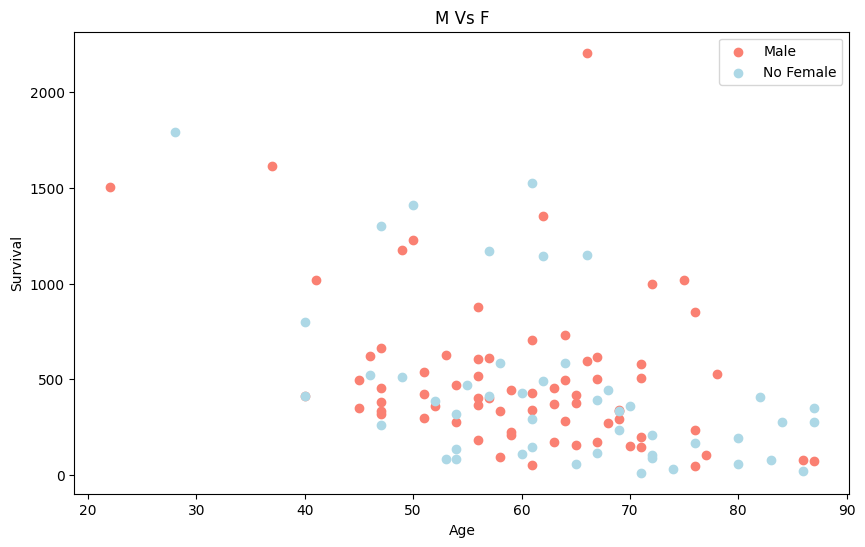

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter( new_df['Age_at_scan_years'][new_df['Gender']==1],
            new_df['Survival_from_surgery_days'][new_df['Gender']==1], 
            
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(new_df['Age_at_scan_years'][new_df['Gender']==0],
    new_df['Survival_from_surgery_days'][new_df['Gender']==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("M Vs F")
plt.ylabel("Survival")
plt.legend(["Male", "No Female"])
plt.xlabel("Age");

In [ ]:
corrM = new_df.corr()

<ipython-input-25-12ab3165e71a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = new_df.corr()


In [ ]:
corrM['Survival_from_surgery_days'][lambda x: abs(x)>0.323]
feature_columns = corrM['Survival_from_surgery_days'][lambda x: abs(x)>0.323].keys()
# len(corrM['Survival_from_surgery_days'][lambda x: abs(x)>0.323])

In [ ]:
filtered_df = new_df[feature_columns]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 329
Data columns (total 51 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Age_at_scan_years                                                   118 non-null    int64  
 1   Survival_from_surgery_days                                          118 non-null    int64  
 2   DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_Bin-11_Probability         118 non-null    float64
 3   DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-13_Frequency                118 non-null    float64
 4   DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-14_Frequency                118 non-null    float64
 5   DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-15_Frequency                118 non-null    float64
 6   DTI_AD_ET_Intensity_InterQuartileRange                              118 non-null    float64
 7   DTI_AD_NC_Histogr

In [ ]:
#filtered_df.to_csv('train.csv',index=False)

In [ ]:
df = pd.read_csv('/content/sample_data/training-data.csv')

<ipython-input-30-6da98f0bdc33>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/training-data.csv')


In [ ]:
df.head()

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days,SubjectID,DSC_ap-rCBV_ED_Intensity_CoefficientOfVariation,DSC_ap-rCBV_ED_Intensity_Energy,DSC_ap-rCBV_ED_Intensity_InterQuartileRange,DSC_ap-rCBV_ED_Intensity_Kurtosis,DSC_ap-rCBV_ED_Intensity_Maximum,...,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeMean,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeVariance,T2_NC_NGTDM_Busyness,T2_NC_NGTDM_Coarsness,T2_NC_NGTDM_Complexity,T2_NC_NGTDM_Contrast,T2_NC_NGTDM_Strength,T2_NC_LBP_Radius-1_Bins-16_LBP
0,UPENN-GBM-00002_11,F,61,291,UPENN-GBM-00002_11,1.006469,292489195.0,29.0,8.792163,255.0,...,21.253112,202.073306,0.279493,26157.184900,116.828033,0.000044,1093.122177,0.269478,0.005695,141135.633800
1,UPENN-GBM-00006_11,M,53,626,UPENN-GBM-00006_11,1.049003,81971150.0,24.0,10.115593,255.0,...,35.092664,92.150579,0.355794,44866.331180,68.546100,0.000070,1258.877860,0.277571,0.009453,86559.097990
2,UPENN-GBM-00008_11,F,55,469,UPENN-GBM-00008_11,0.566691,56110059.0,18.0,9.622088,245.0,...,5.712000,34.504000,0.276032,179.197056,4.902816,0.001293,933.303418,0.522065,0.144847,6752.137494
3,UPENN-GBM-00009_11,M,69,561,UPENN-GBM-00009_11,1.497246,61705916.0,11.0,22.581221,255.0,...,4.472678,111.928962,0.305817,162.588051,13.174632,0.000924,685.148130,0.623936,0.093482,17189.372760
4,UPENN-GBM-00011_11,F,40,798,UPENN-GBM-00011_11,1.059457,23663159.0,9.0,30.216044,223.0,...,20.692456,143.235977,0.277052,18344.889940,69.804583,0.000083,1172.071443,0.700804,0.009554,89650.100100


In [ ]:
y = df['Survival_from_surgery_days']
X = df.drop(["Survival_from_surgery_days","Gender","ID","SubjectID"],axis=1)

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X.shape, y.shape

((452, 4753), (452,))

In [ ]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_t.shape, y_t.shape,X_test.shape,y_test.shape

((384, 4753), (384,), (68, 4753), (68,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=42)
X_train.shape, y_train.shape,X_val.shape,y_val.shape

((326, 4753), (326,), (58, 4753), (58,))

In [ ]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import BayesianRidge
# from sklearn.linear_model import Lasso
# from sklearn.svm import SVR
# from sklearn.kernel_ridge import KernelRidge

# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestRegressor
# Put models in a dictionary
models = {
    "LinearRegression": LinearRegression(),
          "BayesianRidge": BayesianRidge(), 
          "Lasso": Lasso(), 
          "SVR-linear": SVR(kernel="linear"),
          "SVR-rbf": SVR(kernel="rbf"),
          "KernelRidge": KernelRidge(), 
          "GradientBoostingRegressor": GradientBoostingRegressor(), 
          "Random Forest": RandomForestRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = show_scores(model)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_val,
                             y_train=y_train,
                             y_test=y_val)

model_scores

ValueError: ignored